<a href="https://colab.research.google.com/github/caffonso/Control/blob/main/Control11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Critério de desempenho


## Forma geral:
$$ G(s) = \frac{k}{s^{2}+2\zeta\omega_{n} s + \omega_{n}^{2}} $$\
onde:\
$\alpha$ : coeficiente de amortecimento\
$\omega_{n}$: frequencia natural\
$k$ : ganho\
$\zeta$ : grau de amortecimento: 


# Índices de desempenho 

O gráfico da sáida de um entrada do tipo degrau unitário pode ser utilizada para obtenção da Função de Transferência.

**Dados obtidos do gráfico:**

*Máximo sobresinal:*
$$ m_{p} = \frac{y_{tp}-y_\infty}{y_\infty}$$\
*Tempo de pico:*\
$$ t_p = \frac{\pi}{\omega_{d}}$$\
*Tempo de acomodação:*\
$$ t_p = \frac{4}{\zeta\omega_{n}}$$\
*Saida de acomodação*\
$$ \lim_{t \to \infty} y(t) = y_{\infty}$$

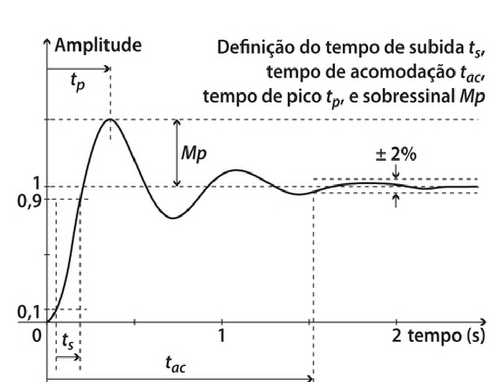

**Valores calculados:**\
*grau de amortecimento*
$$ \zeta = \frac{1}{\sqrt{1+\frac{\pi^2}{(ln(m_p))^2}}}$$\
*frequência natural*
$$ \omega_{n} = \frac{\omega_{d}}{\sqrt{1-\zeta^2}}$$\
*teorema do valor final*
$$ \lim_{s \to  0} sY(s) = \lim_{t \to \infty} y(t) $$\
*portanto para o degrau unitário*
$$\frac{k}{\omega_{n}^{2}} = y_{\infty}$$

In [ ]:
import sympy
import math 
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
sympy.init_printing()
%matplotlib inline

In [ ]:
L    = lambda f: sympy.laplace_transform(f, t, s, noconds=True) 
invL = lambda F: sympy.inverse_laplace_transform(F, s, t)

In [ ]:
t,s = sympy.symbols('t,s')

In [ ]:
def funcTrans(mp,tp,yi):
  z  = 1/np.sqrt(1+(np.pi**2)/(math.log(mp))**2)
  wd = np.pi/tp
  w  = wd/(1-z**2)**.5
  k  = (yi)*w**2
  G = np.around(k,1)/(s**2+2*np.around(z*w,1)*s+np.around(w**2,1))
  return G

In [ ]:
def showGraf(ti,tf,name,y):
  plt.title(name) 
  plt.axhline(y=0, color='black', linewidth=.5)
  plt.axvline(x=0, color='black', linewidth=.5) 
  plt.xlabel("t"),plt.ylabel("y(t)")
  plt.legend(['y'])
  plt.plot(t0,y)
  plt.show()

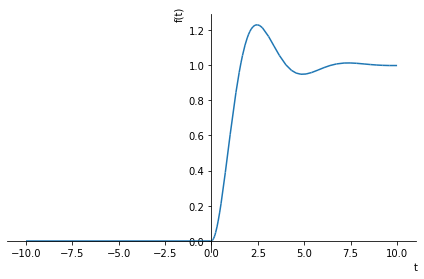

In [ ]:
G = funcTrans(.2,2.5,1)
y = invL(G/s)
sympy.plot(y)
y

É possivel utilizar a biblioteca numpy em associação a sympy, para melhar a representação das funções como segue:


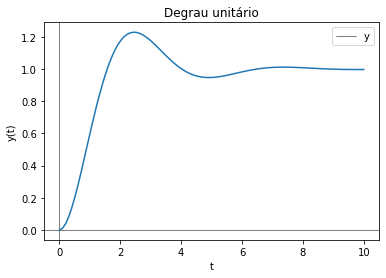

In [ ]:
# Utilizando aa biblioteca numpy
t0 = np.linspace(0,10,100)
a0 = 1
a1 = .6
a2 = -.468
a3 = 1.28
a4 = -1
a5 = 1.28
a6 = -.6
y = (a0*np.exp(a1*t0)+a2*np.sin(a3*t0)+a4*np.cos(a5*t0))*np.exp(a6*t0)

showGraf(0,10,'Degrau unitário',y)


# Aplicações


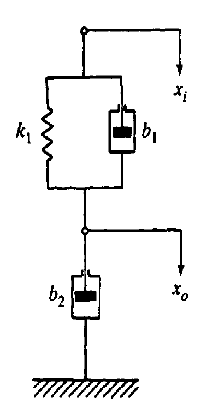



Para sistemas com mais de uma saída, como o exemplo acima podemos escrever:\
$ G(s) = \frac{X_{o}}{X_{i}}(s) $\
Equações diferenciais do sistema:\
$ m_{o}\ddot{x_{0}} = -b_{2}\dot{x_{o}} -k_{1}(x_{o}-x_{i})-b_{1}(\dot{x_{o}}-\dot{x_{i}})$\
mas,\
$m_{o} = 0$\
no dominio das frequências:\
$X_{o}((b_{1}+b_{2})s+k_{1}) = X_{i}(b_{1}s+k_{1}) $\
$$\frac{X_{o}}{X_{i}}(s) = \frac{b_{1}s+k_{1}}{(b_{1}+b_{2})s+k_{1}} $$



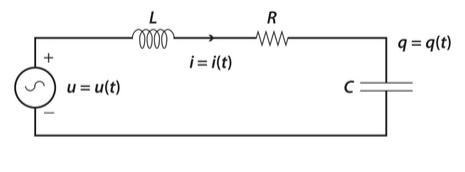

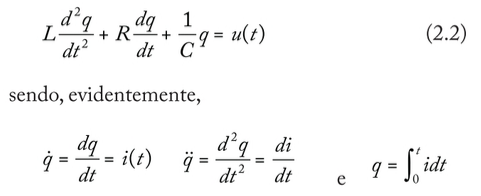

função de transferencia

$$ \frac{Q}{U}(s) = \frac{1/L}{s^{2}+\frac{R}{L}s+\frac{1}{LC}} $$

## Elementos em cascata 

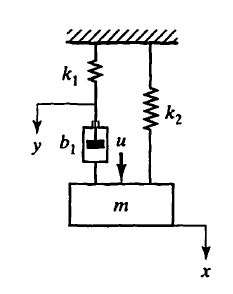

Para sistemas com mais de uma saída, como o exemplo acima podemos escrever:\
$ G(s) = \frac{X}{U}(s) $\
Equações diferenciais do sistema:\
$ m_{0}\ddot{y} =  -k_{1}y-b_{1}(\dot{y}-\dot{x})$\
mas,\
$m_{0} = 0$\
no dominio das frequências:\
$X(ms^{2}+b_{1}s+k_{2}) = Y(b_{1}s)$\
$ Y = X \frac{sb_{1}}{b_{1}s+k_{1}} $\
$ m\ddot{x} =  -k_{2}x-b_{1}(\dot{x}-\dot{y})+u$\
$X(ms^{2}+b_{1}s+k_{2}) = Y(b_{1}s)+U $\
$$\frac{X}{U}(s) = \frac{b_{1}s+k_{1}}{(b_{1}s+k_{1})(s^{2}(m+b^{2}_{1})+b_{1}s+k_{2})} $$


## Atividade 1

O gráfico a seguir apresenta a amplitude $y(t)$ para uma entrada degrau unitário de um sistema de segunda ordem.

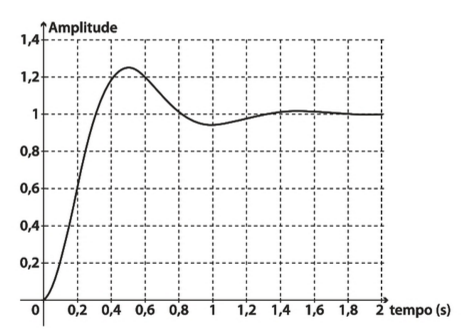

**1.1** Determine os valores aproximados através do gáfico:
  * Tempo de pico - $t_{p}$
  * Tempo de acomodação - $t_{ac}$
  * Máximo sobressinal - $M_{s}$
  * Coeficiente de amortecimento - $\alpha$
  * Grau de amortecimento - $\zeta$
  * frequencia natural - $\omega_{n}$
  * frequencia de resonância - $\omega_{d}$
  * Ganho - $K$

 


Resp.:

**1.2** Encontre a função de transferência que representa este sistema dinâmico.

In [ ]:
# coloque seu código aqui


Resp.: em valores aproximados temos:

$G(s) = \frac{47.2}{s^{2}+5.6s+47.2}$

**1.3** Encontre o gráfico da Amplitude desse sistema para uma entrada senoidal $u(t)=e^{-t}\sin(t)$

In [ ]:
# coloque seu programa aqui


*saída esperada*
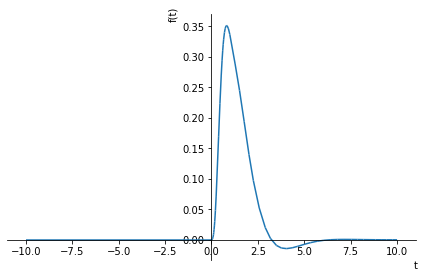

## Atividade 2

Um sistema simplificado de uma suspensão de um automóvel, pode ser realizada conforme modelo a seguir:

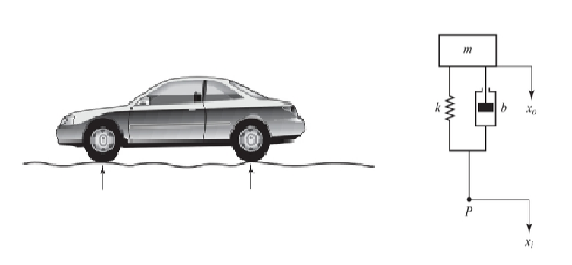

Determine o descolamento da suspensão, simulando um desnível da pista como uma entrada do tipo degrau unitário, sendo:\
$ m = 1000$\
$ k = 500N.m$\
$ b = 50 N.s$

*Equações diferenciais*\
$u(t): input$ (*deslocamento*)

$y(t): output$

*Lei de Newton*

$ \ddot{y} = -\frac{b}{m}(\dot{y} - \dot{u}) - \frac{k}{m}(y - u) $


**1.1** Determine a Função de transferência do sistema

Resp.: 
$G(s) = \frac{500s+50}{1000s^{2}+500s+50}$

**1.2** Determine a amplitude $y(t)$ entrada impulso unitário e seu gráfico:


In [ ]:
# Escreve seu código aqui


*saída esperada*
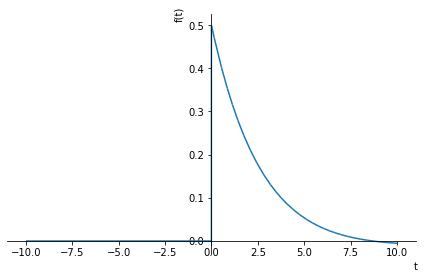

## Atividade 3 
A resposta de um sistema para uma entrada degrau unitário é:\
$ y(t) = 10.e^{-t}cos(2t)$\
Determine a função de transferencia deste sistema.


In [ ]:
# seu código

*saída esperada*
$G(s) = \frac{10s(s+1)}{(s+1)^{2}+4}$